In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import xgboost as xgb
import seaborn as sns

In [2]:
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')
description = pd.read_csv('NYPD_Incident_Level_Data_Column_Descriptions.csv')
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,71.0,FRONT OF,DRUG STORE,NaN,NaN,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)"
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,7.0,OPPOSITE OF,STREET,NaN,NaN,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)"
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,46.0,FRONT OF,STREET,NaN,NaN,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)"
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,48.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)"
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,19.0,INSIDE,DRUG STORE,NaN,NaN,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)"


In [3]:
description

,Column,Description
0,CMPLNT_NUM,Randomly generated persistent ID for each comp...
1,CMPLNT_FR_DT,Exact date of occurrence for the reported even...
2,CMPLNT_FR_TM,Exact time of occurrence for the reported even...
3,CMPLNT_TO_DT,Ending date of occurrence for the reported eve...
4,CMPLNT_TO_TM,Ending time of occurrence for the reported eve...
5,RPT_DT,Date event was reported to police
6,KY_CD,Three digit offense classification code
7,OFNS_DESC,Description of offense corresponding with key ...
8,PD_CD,Three digit internal classification code (more...
9,PD_DESC,Description of internal classification corresp...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048796 entries, 0 to 6048795
Data columns (total 24 columns):
CMPLNT_NUM           int64
CMPLNT_FR_DT         object
CMPLNT_FR_TM         object
CMPLNT_TO_DT         object
CMPLNT_TO_TM         object
RPT_DT               object
KY_CD                int64
OFNS_DESC            object
PD_CD                float64
PD_DESC              object
CRM_ATPT_CPTD_CD     object
LAW_CAT_CD           object
JURIS_DESC           object
BORO_NM              object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC    object
PREM_TYP_DESC        object
PARKS_NM             object
HADEVELOPT           object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lat_Lon              object
dtypes: float64(6), int64(2), object(16)
memory usage: 1.1+ GB


In [5]:
df.LAW_CAT_CD.value_counts()

MISDEMEANOR    3439409
FELONY         1859930
VIOLATION       749457
Name: LAW_CAT_CD, dtype: int64

In [6]:
df.OFNS_DESC.value_counts()

PETIT LARCENY                           987326
HARRASSMENT 2                           736479
ASSAULT 3 & RELATED OFFENSES            625624
CRIMINAL MISCHIEF & RELATED OF          603977
GRAND LARCENY                           516544
DANGEROUS DRUGS                         392992
OFF. AGNST PUB ORD SENSBLTY &           327716
ROBBERY                                 228220
FELONY ASSAULT                          224921
BURGLARY                                216439
MISCELLANEOUS PENAL LAW                 145888
DANGEROUS WEAPONS                       143395
OFFENSES AGAINST PUBLIC ADMINI          117062
GRAND LARCENY OF MOTOR VEHICLE          114071
INTOXICATED & IMPAIRED DRIVING           85349
CRIMINAL TRESPASS                        74083
VEHICLE AND TRAFFIC LAWS                 72173
SEX CRIMES                               68020
THEFT-FRAUD                              66184
FORGERY                                  61024
FRAUDS                                   38308
POSSESSION OF

In [7]:
df.JURIS_DESC.value_counts()

N.Y. POLICE DEPT                       5373664
N.Y. HOUSING POLICE                     466126
N.Y. TRANSIT POLICE                     132880
PORT AUTHORITY                           29375
OTHER                                    16880
POLICE DEPT NYC                           8987
DEPT OF CORRECTIONS                       7841
TRI-BORO BRDG TUNNL                       5143
HEALTH & HOSP CORP                        3047
N.Y. STATE POLICE                         1491
METRO NORTH                                658
FIRE DEPT (FIRE MARSHAL)                   514
LONG ISLAND RAILRD                         494
STATN IS RAPID TRANS                       387
N.Y. STATE PARKS                           377
U.S. PARK POLICE                           223
NYC PARKS                                  202
NEW YORK CITY SHERIFF OFFICE               192
AMTRACK                                    171
NYS DEPT TAX AND FINANCE                    84
SEA GATE POLICE DEPT                        30
CONRAIL      

In [8]:
df = df.drop(["LOC_OF_OCCUR_DESC","PARKS_NM","HADEVELOPT","PREM_TYP_DESC","Lat_Lon"],axis=1)
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,1007314.0,241257.0,40.828848,-73.916661
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,1043991.0,193406.0,40.697338,-73.784557
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,999463.0,231690.0,40.802607,-73.945052
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,1060183.0,177862.0,40.654549,-73.726339
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,987606.0,208148.0,40.738002,-73.987891
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,N.Y. POLICE DEPT,BROOKLYN,71.0,996149.0,181562.0,40.665023,-73.957111
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,7.0,987373.0,201662.0,40.720200,-73.988735
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,46.0,1009041.0,247401.0,40.845707,-73.910398
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,48.0,1014154.0,251416.0,40.856711,-73.891900
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,19.0,994327.0,218211.0,40.765618,-73.963623


In [9]:
df = df[df.JURIS_DESC == "N.Y. POLICE DEPT"]
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,1007314.0,241257.0,40.828848,-73.916661
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,1043991.0,193406.0,40.697338,-73.784557
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,999463.0,231690.0,40.802607,-73.945052
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,1060183.0,177862.0,40.654549,-73.726339
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,987606.0,208148.0,40.738002,-73.987891
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,N.Y. POLICE DEPT,BROOKLYN,71.0,996149.0,181562.0,40.665023,-73.957111
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,7.0,987373.0,201662.0,40.720200,-73.988735
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,46.0,1009041.0,247401.0,40.845707,-73.910398
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,48.0,1014154.0,251416.0,40.856711,-73.891900
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,19.0,994327.0,218211.0,40.765618,-73.963623


Limiting the analysis to only cases that went to NYPD specifically

In [10]:
df.JURIS_DESC.value_counts()

N.Y. POLICE DEPT    5373664
Name: JURIS_DESC, dtype: int64

In [11]:
df.CMPLNT_TO_DT = df.CMPLNT_TO_DT.fillna(df.CMPLNT_FR_DT)
df.CMPLNT_TO_TM = df.CMPLNT_TO_TM.fillna(df.CMPLNT_FR_TM)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
offense_count = df.OFNS_DESC.value_counts()

In [13]:
offense_count.head(20)

PETIT LARCENY                     942486
HARRASSMENT 2                     658744
CRIMINAL MISCHIEF & RELATED OF    545221
ASSAULT 3 & RELATED OFFENSES      544440
GRAND LARCENY                     481296
DANGEROUS DRUGS                   312739
OFF. AGNST PUB ORD SENSBLTY &     290699
BURGLARY                          210779
ROBBERY                           205573
FELONY ASSAULT                    193945
MISCELLANEOUS PENAL LAW           117776
DANGEROUS WEAPONS                 113003
GRAND LARCENY OF MOTOR VEHICLE    110989
OFFENSES AGAINST PUBLIC ADMINI     88473
INTOXICATED & IMPAIRED DRIVING     80649
VEHICLE AND TRAFFIC LAWS           65383
THEFT-FRAUD                        62387
SEX CRIMES                         55338
FORGERY                            48115
CRIMINAL TRESPASS                  45477
Name: OFNS_DESC, dtype: int64

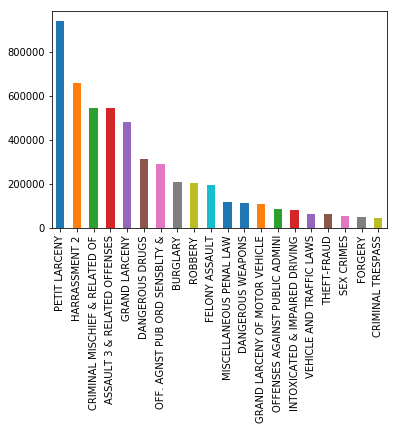

In [14]:
offense_count.head(20).plot(kind='bar')

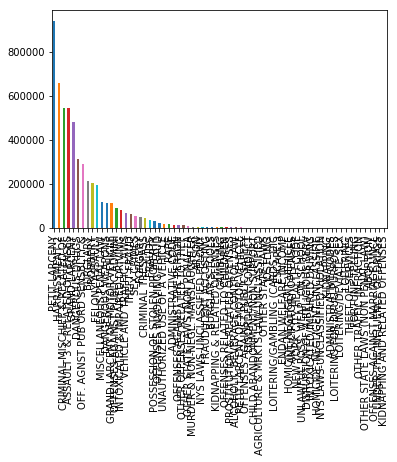

In [15]:
offense_count.plot(kind='bar')

In [16]:
offense_count.sum()

5359025

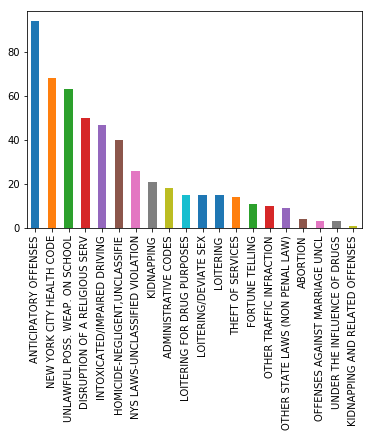

In [17]:
offense_count.tail(20).plot(kind='bar')

The most common crime reported is petty theft at around 800,000 and the least reported crimes are rarely reported, which are only in the double digits. As a result, only the top 20 crimes in the dataset will be used for analysis.

In [18]:
precinct_count = df.ADDR_PCT_CD.value_counts()
precinct_count.head(10)

75.0     170409
44.0     141243
43.0     132046
52.0     123555
46.0     123179
14.0     118874
120.0    116401
67.0     113216
47.0     100314
40.0      98798
Name: ADDR_PCT_CD, dtype: int64

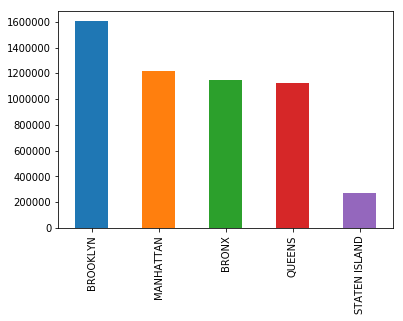

In [19]:
boroughs = df.BORO_NM.value_counts()
boroughs.plot(kind='bar')

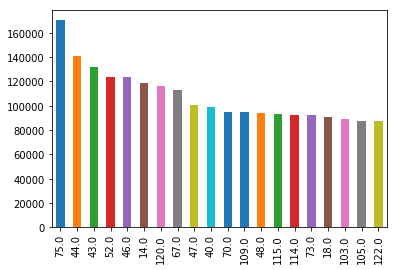

In [20]:
precinct_count.head(20).plot(kind='bar')

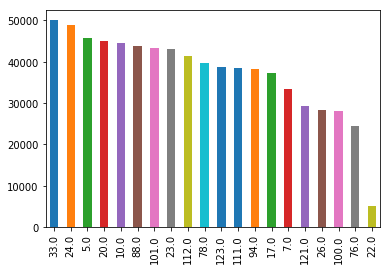

In [21]:
precinct_count.tail(20).plot(kind='bar')

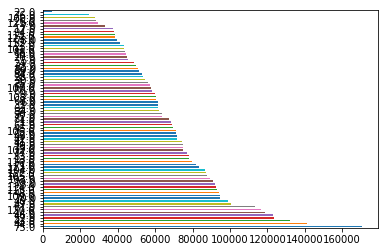

In [22]:
precinct_count.plot(kind='barh')

In [23]:
df['CMPLT_FR'] = df.CMPLNT_FR_DT + df.CMPLNT_FR_TM
df['CMPLT_TO'] = df.CMPLNT_TO_DT + df.CMPLNT_TO_TM
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,CMPLT_FR,CMPLT_TO
0,101109527,12/31/2015,23:45:00,12/31/2015,23:45:00,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,FELONY,N.Y. POLICE DEPT,BRONX,44.0,1007314.0,241257.0,40.828848,-73.916661,12/31/201523:45:00,12/31/201523:45:00
1,153401121,12/31/2015,23:36:00,12/31/2015,23:36:00,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,1043991.0,193406.0,40.697338,-73.784557,12/31/201523:36:00,12/31/201523:36:00
2,569369778,12/31/2015,23:30:00,12/31/2015,23:30:00,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,999463.0,231690.0,40.802607,-73.945052,12/31/201523:30:00,12/31/201523:30:00
3,968417082,12/31/2015,23:30:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,1060183.0,177862.0,40.654549,-73.726339,12/31/201523:30:00,12/31/201523:30:00
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,987606.0,208148.0,40.738002,-73.987891,12/31/201523:25:00,12/31/201523:30:00


In [24]:
df.CMPLT_TO = pd.to_datetime(df.CMPLT_TO,format='%m/%d/%Y%H:%M:%S',errors='coerce')
df.CMPLT_FR = pd.to_datetime(df.CMPLT_FR,format='%m/%d/%Y%H:%M:%S',errors='coerce')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,CMPLT_FR,CMPLT_TO
0,101109527,12/31/2015,23:45:00,12/31/2015,23:45:00,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,FELONY,N.Y. POLICE DEPT,BRONX,44.0,1007314.0,241257.0,40.828848,-73.916661,2015-12-31 23:45:00,2015-12-31 23:45:00
1,153401121,12/31/2015,23:36:00,12/31/2015,23:36:00,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,1043991.0,193406.0,40.697338,-73.784557,2015-12-31 23:36:00,2015-12-31 23:36:00
2,569369778,12/31/2015,23:30:00,12/31/2015,23:30:00,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,999463.0,231690.0,40.802607,-73.945052,2015-12-31 23:30:00,2015-12-31 23:30:00
3,968417082,12/31/2015,23:30:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,1060183.0,177862.0,40.654549,-73.726339,2015-12-31 23:30:00,2015-12-31 23:30:00
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,987606.0,208148.0,40.738002,-73.987891,2015-12-31 23:25:00,2015-12-31 23:30:00


In [25]:
df = df.dropna(how='any')

In [26]:
df.count()

CMPLNT_NUM          5187096
CMPLNT_FR_DT        5187096
CMPLNT_FR_TM        5187096
CMPLNT_TO_DT        5187096
CMPLNT_TO_TM        5187096
RPT_DT              5187096
KY_CD               5187096
OFNS_DESC           5187096
PD_CD               5187096
PD_DESC             5187096
CRM_ATPT_CPTD_CD    5187096
LAW_CAT_CD          5187096
JURIS_DESC          5187096
BORO_NM             5187096
ADDR_PCT_CD         5187096
X_COORD_CD          5187096
Y_COORD_CD          5187096
Latitude            5187096
Longitude           5187096
CMPLT_FR            5187096
CMPLT_TO            5187096
dtype: int64

# Model Building

In [27]:
df = df.drop(['CMPLNT_FR_DT','CMPLNT_FR_TM','CMPLNT_TO_DT','CMPLNT_TO_TM'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5187096 entries, 0 to 6048794
Data columns (total 17 columns):
CMPLNT_NUM          int64
RPT_DT              object
KY_CD               int64
OFNS_DESC           object
PD_CD               float64
PD_DESC             object
CRM_ATPT_CPTD_CD    object
LAW_CAT_CD          object
JURIS_DESC          object
BORO_NM             object
ADDR_PCT_CD         float64
X_COORD_CD          float64
Y_COORD_CD          float64
Latitude            float64
Longitude           float64
CMPLT_FR            datetime64[ns]
CMPLT_TO            datetime64[ns]
dtypes: datetime64[ns](2), float64(6), int64(2), object(7)
memory usage: 712.3+ MB


In [28]:
borough = []
for row in df.BORO_NM:
    if row == 'QUEENS':
        borough.append(1)
    elif row == 'BROOKLYN':
        borough.append(2)
    elif row == 'STATEN ISLAND':
        borough.append(3)
    elif row == 'BRONX':
        borough.append(4)
    elif row == 'MANHATTAN':
        borough.append(5)
df['BORO_NUM'] = borough
df.head()

,CMPLNT_NUM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,CMPLT_FR,CMPLT_TO,BORO_NUM
0,101109527,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,1007314.0,241257.0,40.828848,-73.916661,2015-12-31 23:45:00,2015-12-31 23:45:00,4
2,569369778,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,999463.0,231690.0,40.802607,-73.945052,2015-12-31 23:30:00,2015-12-31 23:30:00,5
3,968417082,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,1060183.0,177862.0,40.654549,-73.726339,2015-12-31 23:30:00,2015-12-31 23:30:00,1
4,641637920,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,987606.0,208148.0,40.738002,-73.987891,2015-12-31 23:25:00,2015-12-31 23:30:00,5
5,365661343,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,N.Y. POLICE DEPT,BROOKLYN,71.0,996149.0,181562.0,40.665023,-73.957111,2015-12-31 23:18:00,2015-12-31 23:25:00,2


In [29]:
df.drop(['BORO_NM'],axis=1)

,CMPLNT_NUM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,CMPLT_FR,CMPLT_TO,BORO_NUM
0,101109527,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,44.0,1007314.0,241257.0,40.828848,-73.916661,2015-12-31 23:45:00,2015-12-31 23:45:00,4
2,569369778,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,28.0,999463.0,231690.0,40.802607,-73.945052,2015-12-31 23:30:00,2015-12-31 23:30:00,5
3,968417082,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,105.0,1060183.0,177862.0,40.654549,-73.726339,2015-12-31 23:30:00,2015-12-31 23:30:00,1
4,641637920,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,13.0,987606.0,208148.0,40.738002,-73.987891,2015-12-31 23:25:00,2015-12-31 23:30:00,5
5,365661343,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,N.Y. POLICE DEPT,71.0,996149.0,181562.0,40.665023,-73.957111,2015-12-31 23:18:00,2015-12-31 23:25:00,2
6,608231454,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,7.0,987373.0,201662.0,40.720200,-73.988735,2015-12-31 23:15:00,2015-12-31 23:15:00,5
7,265023856,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,COMPLETED,FELONY,N.Y. POLICE DEPT,46.0,1009041.0,247401.0,40.845707,-73.910398,2015-12-31 23:15:00,2015-12-31 23:15:00,4
8,989238731,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,48.0,1014154.0,251416.0,40.856711,-73.891900,2015-12-31 23:15:00,2015-12-31 23:30:00,4
9,415095955,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,19.0,994327.0,218211.0,40.765618,-73.963623,2015-12-31 23:10:00,2015-12-31 23:10:00,5
10,731283092,12/31/2015,341,PETIT LARCENY,343.0,"LARCENY,PETIT OF BICYCLE",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,41.0,1014216.0,238784.0,40.822040,-73.891732,2015-12-31 23:05:00,2015-12-31 23:15:00,4


In [30]:
df['from_year'] = pd.DatetimeIndex(df['CMPLT_FR']).year
df['from_month'] = pd.DatetimeIndex(df['CMPLT_FR']).month
df['from_day'] = pd.DatetimeIndex(df['CMPLT_FR']).day
df['from_hour'] = pd.DatetimeIndex(df['CMPLT_FR']).hour
df['from_minute'] = pd.DatetimeIndex(df['CMPLT_FR']).minute
df['from_seconds'] = pd.DatetimeIndex(df['CMPLT_FR']).second

In [31]:
df['to_year'] = pd.DatetimeIndex(df['CMPLT_TO']).year
df['to_month'] = pd.DatetimeIndex(df['CMPLT_TO']).month
df['to_day'] = pd.DatetimeIndex(df['CMPLT_TO']).day
df['to_hour'] = pd.DatetimeIndex(df['CMPLT_TO']).hour
df['to_minute'] = pd.DatetimeIndex(df['CMPLT_TO']).minute
df['to_seconds'] = pd.DatetimeIndex(df['CMPLT_TO']).second

In [32]:
top_20 = offense_count.head(21).index
df_20 = df.loc[df.OFNS_DESC.isin(top_20)]
df_20.head(10)

,CMPLNT_NUM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,...,from_day,from_hour,from_minute,from_seconds,to_year,to_month,to_day,to_hour,to_minute,to_seconds
0,101109527,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,...,31,23,45,0,2015,12,31,23,45,0
2,569369778,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,...,31,23,30,0,2015,12,31,23,30,0
3,968417082,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,...,31,23,30,0,2015,12,31,23,30,0
4,641637920,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,...,31,23,25,0,2015,12,31,23,30,0
5,365661343,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,N.Y. POLICE DEPT,BROOKLYN,...,31,23,18,0,2015,12,31,23,25,0
6,608231454,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,...,31,23,15,0,2015,12,31,23,15,0
7,265023856,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,...,31,23,15,0,2015,12,31,23,15,0
8,989238731,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,...,31,23,15,0,2015,12,31,23,30,0
9,415095955,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,...,31,23,10,0,2015,12,31,23,10,0
10,731283092,12/31/2015,341,PETIT LARCENY,343.0,"LARCENY,PETIT OF BICYCLE",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,...,31,23,5,0,2015,12,31,23,15,0


In [33]:
off = df_20.OFNS_DESC.unique()
len(off)

20

I limit the number of classes of offenses to the 15 most common offenses since there might not be enough data on less reported offenses to build a model with.

In [34]:
offenses = {}
for n in range(20):
    offenses[off[n]] = n
offenses

{'FORGERY': 0,
 'DANGEROUS DRUGS': 1,
 'ASSAULT 3 & RELATED OFFENSES': 2,
 'FELONY ASSAULT': 3,
 'DANGEROUS WEAPONS': 4,
 'PETIT LARCENY': 5,
 'GRAND LARCENY': 6,
 'ROBBERY': 7,
 'OFFENSES AGAINST PUBLIC ADMINI': 8,
 'CRIMINAL MISCHIEF & RELATED OF': 9,
 'INTOXICATED & IMPAIRED DRIVING': 10,
 'BURGLARY': 11,
 'CRIMINAL TRESPASS': 12,
 'HARRASSMENT 2': 13,
 'MISCELLANEOUS PENAL LAW': 14,
 'VEHICLE AND TRAFFIC LAWS': 15,
 'OFF. AGNST PUB ORD SENSBLTY &': 16,
 'FRAUDS': 17,
 'GRAND LARCENY OF MOTOR VEHICLE': 18,
 'THEFT-FRAUD': 19}

In [35]:
ofns = []
keys = offenses.keys()

for n in df_20.OFNS_DESC:
    ofns.append(offenses[n])
ofns

[0,
 1,
 2,
 2,
 3,
 1,
 4,
 2,
 5,
 5,
 5,
 6,
 6,
 0,
 7,
 6,
 8,
 2,
 9,
 1,
 1,
 3,
 4,
 2,
 2,
 4,
 10,
 9,
 1,
 3,
 3,
 4,
 3,
 9,
 7,
 9,
 2,
 7,
 1,
 11,
 2,
 2,
 12,
 13,
 14,
 15,
 13,
 2,
 3,
 14,
 4,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 4,
 4,
 16,
 6,
 16,
 16,
 3,
 0,
 14,
 13,
 5,
 13,
 3,
 14,
 2,
 2,
 17,
 1,
 2,
 2,
 15,
 3,
 16,
 13,
 3,
 13,
 2,
 13,
 13,
 1,
 13,
 10,
 3,
 2,
 8,
 5,
 3,
 16,
 5,
 5,
 13,
 5,
 2,
 6,
 1,
 2,
 15,
 8,
 2,
 8,
 2,
 10,
 2,
 13,
 13,
 5,
 13,
 2,
 11,
 6,
 6,
 13,
 13,
 7,
 4,
 2,
 2,
 13,
 13,
 9,
 5,
 18,
 13,
 1,
 1,
 5,
 7,
 1,
 8,
 1,
 2,
 6,
 16,
 13,
 2,
 9,
 13,
 10,
 5,
 5,
 13,
 3,
 5,
 9,
 5,
 5,
 2,
 2,
 5,
 5,
 11,
 6,
 6,
 13,
 15,
 6,
 2,
 2,
 3,
 6,
 1,
 7,
 13,
 2,
 6,
 13,
 15,
 13,
 13,
 2,
 13,
 2,
 2,
 3,
 2,
 5,
 5,
 5,
 13,
 14,
 11,
 5,
 2,
 2,
 2,
 7,
 2,
 14,
 15,
 5,
 9,
 13,
 5,
 6,
 5,
 13,
 13,
 18,
 1,
 7,
 1,
 5,
 2,
 12,
 11,
 9,
 5,
 13,
 5,
 12,
 12,
 5,
 5,
 6,
 8,
 13,
 11,
 16,
 9,
 18,
 8,
 5,
 7,
 2,
 6

In [36]:
df_20['OFFENSE_NUMBER'] = ofns
df_20.head(10)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CMPLNT_NUM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,...,from_hour,from_minute,from_seconds,to_year,to_month,to_day,to_hour,to_minute,to_seconds,OFFENSE_NUMBER
0,101109527,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,...,23,45,0,2015,12,31,23,45,0,0
2,569369778,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,...,23,30,0,2015,12,31,23,30,0,1
3,968417082,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,...,23,30,0,2015,12,31,23,30,0,2
4,641637920,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,...,23,25,0,2015,12,31,23,30,0,2
5,365661343,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,N.Y. POLICE DEPT,BROOKLYN,...,23,18,0,2015,12,31,23,25,0,3
6,608231454,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,...,23,15,0,2015,12,31,23,15,0,1
7,265023856,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,...,23,15,0,2015,12,31,23,15,0,4
8,989238731,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,...,23,15,0,2015,12,31,23,30,0,2
9,415095955,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,...,23,10,0,2015,12,31,23,10,0,5
10,731283092,12/31/2015,341,PETIT LARCENY,343.0,"LARCENY,PETIT OF BICYCLE",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,...,23,5,0,2015,12,31,23,15,0,5


In [37]:
df_20 = df_20.dropna(how='any')

features = df_20[['ADDR_PCT_CD','Latitude','Longitude','BORO_NUM','from_year','from_month','from_day',
               'from_hour','from_minute','from_seconds','to_year','to_month','to_day','to_hour','to_minute','to_seconds']]

target = df_20.OFNS_DESC

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain,Xtest,ytrain,ytest = train_test_split(features,target,test_size=0.1,random_state=42)


In [39]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(Xtrain,ytrain)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
# import pickle
# from sklearn.externals import joblib
# filename = 'rfc_model.sav'
# joblib.dump(rfc, filename)

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

y_pred = rfc.predict(Xtest)

score = accuracy_score(ytest,y_pred)
print(score)

cvs = cross_val_score(rfc,features,target)
print(cvs)

0.26691479515556155


KeyboardInterrupt: 

In [ ]:
imp = rfc.feature_importances_
feats = features.columns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)
indices = np.argsort(imp)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), imp[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(imp[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feats[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn import cross_validation, metrics

In [ ]:
X = features
y = df_20.OFFENSE_NUMBER
Xtr,Xtst,ytr,ytst = train_test_split(X,y,test_size=0.1,random_state=4)
dtrain = xgb.DMatrix(Xtr,label=ytr)
dtest = xgb.DMatrix(Xtst,label=ytst)

In [ ]:
print(dtrain.feature_types)
print(dtrain.feature_names)

In [ ]:
print(dtest.feature_types)

In [ ]:
model = XGBClassifier()
model.fit(Xtr,ytr)

In [ ]:
ypred = model.predict(Xtst)
print(accuracy_score(ypred,ytst))


In [ ]:
print(cross_val_score(model,features,target,cv=5))

In [ ]:
importances = model.feature_importances_
feat_names = features.columns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [ ]:
watchlist = [(dtrain, 'train'), (dtest, 'test')]

In [ ]:
from sklearn.metrics import log_loss

logloss = log_loss(ytest,ypred,labels=off[:2])

print("Baseline Log Loss is {:.2f}".format(logloss))

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'multi:softmax',
    'num_class': 67,
    'booster':'gbtree',
    
}

In [ ]:
params['eval_metric'] = "mlogloss"
num_boost_round = 100

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
print("Best Logloss: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

In [ ]:
import pickle

pickle.dump(model, open("model.pickle.dat","rb"))

In [ ]:
best_model.save_model("ny_model.model")